In [3]:
from qiskit import *
import numpy as np
from qiskit import IBMQ

token='a2afa69f70955de3c84068e58c44bd81e01740c07ff40db7e9ab824c0da8b9412da7a86e9c453f7f97ecc35fc9f09948ce053cbd9e8213b98feadba15dcc467f'
#IBMQ.enable_account(token)
IBMQ.save_account(token,overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ornl',group='ornl',project='csc517')
backend = provider.get_backend('ibm_algiers')
backend_config = backend.configuration()

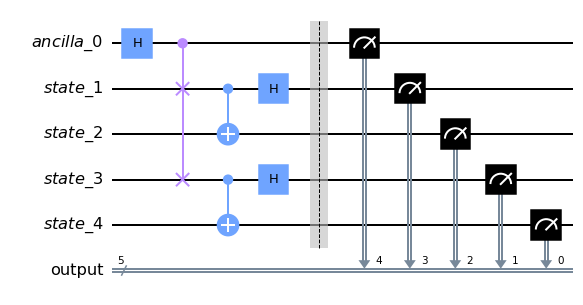

In [4]:
ancilla = QuantumRegister(1, 'ancilla_0')
A = QuantumRegister(1,'state_1')
B = QuantumRegister(1,'state_2')
C = QuantumRegister(1,'state_3')
D = QuantumRegister(1,'state_4')
Meas = ClassicalRegister(5,'output')

circuit = QuantumCircuit(ancilla, A, B, C, D, Meas)

angle = 0.1*np.pi

#circuit.initialize([np.cos(0*angle/2),np.sin(0*angle/2)],0+1)
#circuit.initialize([np.cos(1*angle/2),np.sin(1*angle/2)],1+1)
#circuit.initialize([np.cos(2*angle/2),np.sin(2*angle/2)],2+1)
#circuit.initialize([np.cos(3*angle/2),np.sin(3*angle/2)],3+1)

circuit.h(0)

circuit.cswap(0,1,3)

circuit.cx(1,2)
circuit.cx(3,4)
circuit.h(1)
circuit.h(3)

circuit.barrier()

circuit.measure(0,4-0)
circuit.measure(1,4-1)
circuit.measure(2,4-2)
circuit.measure(3,4-3)
circuit.measure(4,4-4)
    

circuit.draw(output='mpl')

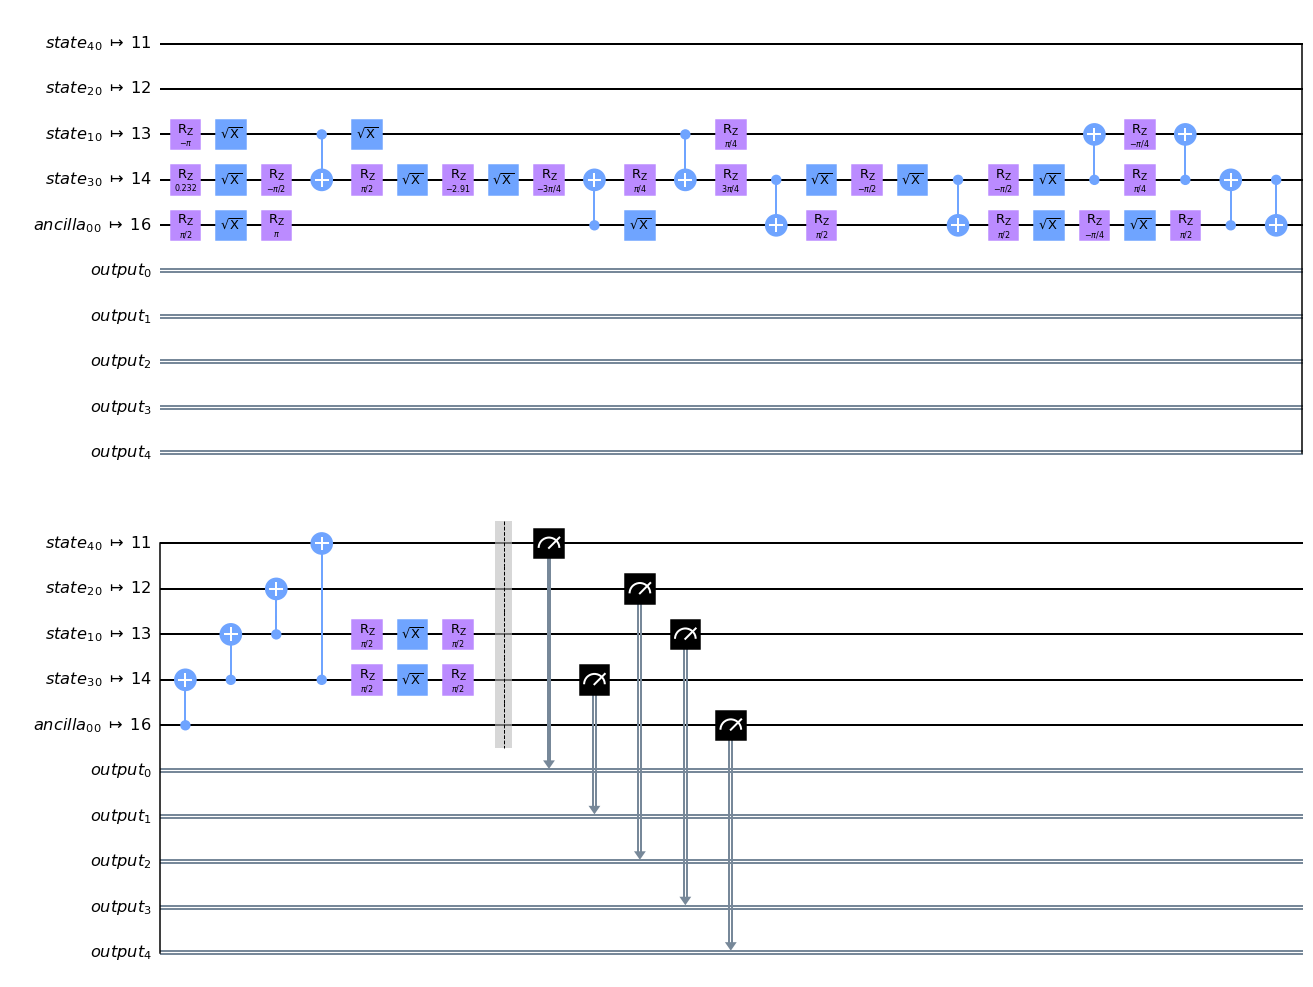

In [13]:
final = transpile(circuit, backend, optimization_level=3)
final.draw('mpl',cregbundle=False,idle_wires=False)
# 31 ECRs on sherbrooke, transpile 1
# 18 ECRs on sherbrooke, transpile 3
# 23 CNOTs on guadalupe, transpile 1
# 16 CNOTs on guadalupe, transpile 3 (13 with 0*angle?) (18 with 0.1*angle) (14 with 0.15*angle)
# 17 CNOTs on algiers, transpile 3
# 18 CNOTs on mumbai, transpile 3 (12 with 0.1)

In [11]:
shots = 10000
job = backend.run(final,shots=shots)

from qiskit.tools.monitor import job_monitor
#job_monitor(job)

KeyboardInterrupt: 

In [ ]:
result = job.result(timeout=120)
counts = result.get_counts(circuit)
print(counts)

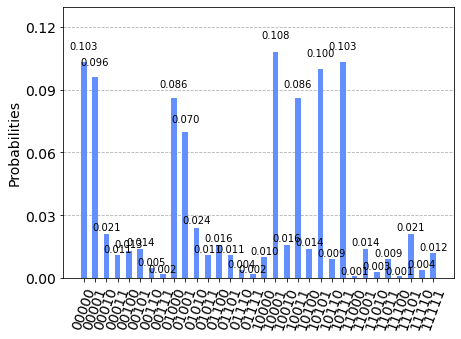

In [174]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [176]:


r12 = 1-4*(counts.get('01100',0)+counts.get('01101',0)+counts.get('01110',0)+counts.get('01111',0))/shots
print(f"r_12 = {r12}")
r23 = 1-4*(counts.get('11100',0)+counts.get('11101',0)+counts.get('11110',0)+counts.get('11111',0))/shots
print(f"r_23 = {r23}")
r34 = 1-4*(counts.get('00011',0)+counts.get('00111',0)+counts.get('01011',0)+counts.get('01111',0))/shots
print(f"r_34 = {r34}")
r14 = 1-4*(counts.get('10011',0)+counts.get('10111',0)+counts.get('11011',0)+counts.get('11111',0))/shots
print(f"r_14 = {r14}")

inequality = r12 + r23 + r34 - r14

print(f"r_12 + r_23 + r_34 - r_14 = {inequality}")

print(f"\nraw:\n{angle/np.pi},{r12},{r23},{r34},{r14},{inequality}")



r_12 = 0.736
r_23 = 0.696
r_34 = 0.792
r_14 = -0.6799999999999999
r_12 + r_23 + r_34 - r_14 = 2.904

raw:
0.26,0.736,0.696,0.792,-0.6799999999999999,2.904
